# Tugas 2 - K-Means

# # Nama : Nopita Pratiwi Patmawati
# # NIM    : 1301152636
# # Kelas : IF-39-05

analisis masalah: 
terdapat suatu data train dan data test yang bersifat acak dengan 2 dimensi. data train yang digunakan berjumlah 688 data dan data test berjumlah 100 data kedua data ini tidak memiliki label. dalam hal ini, diajukan metode k-means yang digunakan sebagai unsupervised clustering. proses testing yang dilakukan adalah mencari nilai model k yang sesuai kemudian memberikan label untuk data testing.

desain : 
dalam hal ini, desain yang dicari adalah model dari k-means yaitu nilai k yang sesuai. untuk mendapatkan nilai k yang sesuai digunakan elbow distance sehingga mendapatkan nilai k yang optimal. untuk mendapatkan elbow distance maka diperlukan nilai SSE setiap nilai k.

In [253]:
import matplotlib
import matplotlib.pyplot as plt
import plotly
from plotly.offline import *
import plotly.plotly as ply
import plotly.graph_objs as go
from plotly.graph_objs import *
import pandas as pa
import numpy as np
import random

In [267]:
# Membaca file
train = pa.read_csv('TrainsetTugas2.txt', sep='\t', header=None).as_matrix()
test = pa.read_csv('TestsetTugas2.txt', sep='\t', header=None).as_matrix()
# membagi data x dan y
xTrain = train[:,0]
yTrain = train[:,-1]

In [255]:
# membuat scatter plot sebaran data train
trace1 = go.Scatter(
    x=xTrain,
    y=yTrain,
    mode='markers'
)
data = [trace1]

layout = go.Layout(
    title = 'Data Train Scatter',
)
fig = go.Figure(data=data, layout=layout)
plot(fig, filename='Data train Scatter.html')

'file://C:\\Users\\ASUS\\Documents\\Tugas 2 K-Means\\Data train Scatter.html'

In [256]:
from numpy import linalg as lg
# mencari jarak
def euclid(cent, t):
    return lg.norm(cent-t)

# mencari sse
def sse(kolom, dist):
    z=0
    for i in range(len(dist)):
        z = z+(dist[i,kolom]**2)
    return z

#membagi kedalam kelas
def cluster(h,p):
    clusx=[]
    clusy = []
    for j in range(len(h)):
            if(hasil[j,2]==p):
                clusx.append(h[j,0])
                clusy.append(h[j,1])
    return clusx, clusy

#mencari centroid baru
def cenBaru(hasil, p):
    clusx = []
    clusy = []
    cen2 = np.zeros((1,2))
    clusx, clusy = cluster(hasil, p)
    cen2[0,0] = np.mean(clusx[:])
    cen2[0,1] = np.mean(clusy[:])
    return cen2

#mencari jarak dan sse masing-masing centroid
def distance(centr, data, w):
    sse1 = np.zeros((w,1))
    label1 = np.zeros(len(data))
    jarak = np.zeros((len(data),w))
    for i in range(w):
        for j in range(len(data)):
            jarak[j,i] = euclid(centr[i,:], data[j])
            label1[j] = int(np.argmin(jarak[j,:]))
            label1=label1.astype(np.int64)
        sse1[i,:] = sse(i,jarak)
    return sse1, label1

nilai k= 0
nilai k= 1
nilai k= 2
nilai k= 3
nilai k= 4
[[ 355835.28134275]
 [ 598188.20510349]
 [1091220.28293612]
 [1493323.86750165]
 [2023702.34784972]]


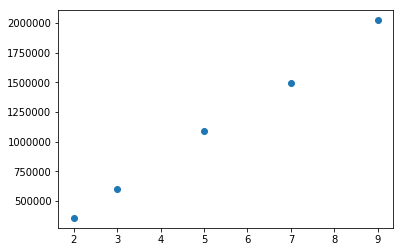

In [257]:
k=[2,3,5,7,9] #jumlah k
thres = 0.8
label = np.zeros((len(train),len(k)))
hasil = np.zeros((len(train), 3))
hasil[:,0]=train[:,0]
hasil[:,1]=train[:,1]
totsse=np.zeros((len(k),1))
for q in range(len(k)):
    sselama = np.zeros((k[q],1))
    #membuat matriks centroid baru
    newcen = np.zeros((k[q],2))
    cen = np.zeros((k[q],2))
    #merandom centroid awal
    for i in range(k[q]):
        cen[i,0] = random.uniform(0,40)
        cen[i,1] = random.uniform(0,30)
    sselama, label[:,q] = distance(cen,train, k[q])
    delta = np.sum(sselama)
    #melooping hingga nilai centroid tidak berubah
    while delta>thres:    
        ssebaru = np.zeros((k[q],1))
        hasil[:,2]=label[:,q]
        for i in range(k[q]):
            newcen[i]=cenBaru(hasil, i)
        ssebaru, label[:,q] = distance(newcen, train, k[q])
        delta = lg.norm(np.sum(ssebaru)-np.sum(sselama))
        if(delta>thres):
            sselama=ssebaru
    totsse[q,:]=np.sum(ssebaru)
    print('nilai k=',q)
print(totsse)
plt.plot(k, totsse, 'o')

nilai k diperoleh dari percobaan terhadap k =2, k=3, k=5, k=7, dan k=9. karena didapatkan nilai k yang sesuai adalah k=7 pada elbow distance. untuk grafik persebaran data diletakkan pada file yang berbeda.

nilai k =  2
nilai k =  3
nilai k =  5
nilai k =  7
nilai k =  9


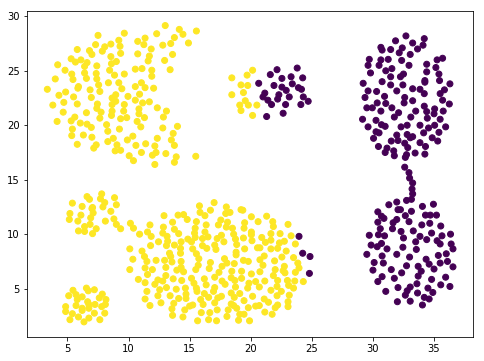

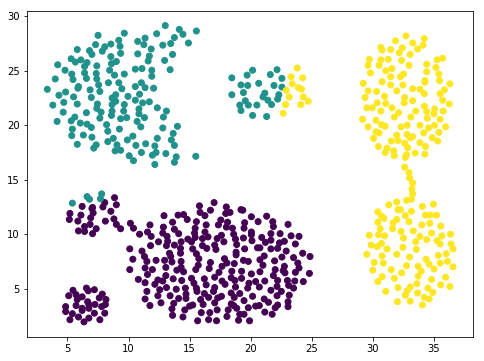

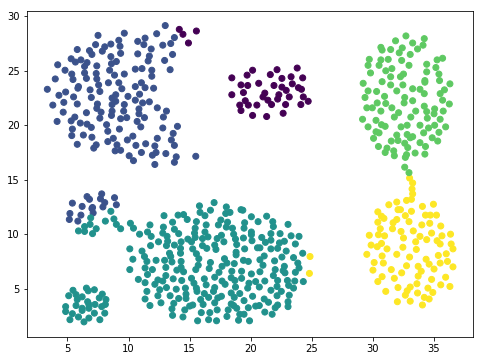

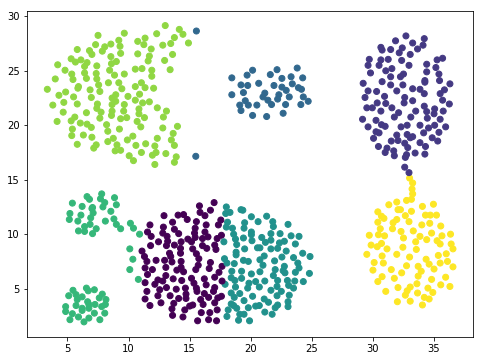

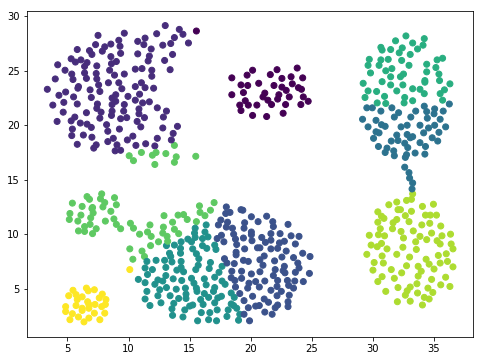

In [258]:
for i in range(len(k)):
    print('nilai k = ', k[i])
    plt.figure(figsize=(8, 6))
    plt.scatter(train[:,0], train[:,1], c=label[:,i].astype(int))

In [268]:
labeltest = np.zeros(len(test))
hasiltest = np.zeros((len(test), 3))
hasiltest[:,0]=test[:,0]
hasiltest[:,1]=test[:,1]
ktest=7
for q in range(ktest):
    sselama = np.zeros((ktest,1))
    newcen = np.zeros((ktest,2))
    #membuat matriks centroid baru
    cen = np.zeros((ktest,2))
    #merandom centroid awal
    for i in range(ktest):
        cen[i,0] = random.uniform(0,40)
        cen[i,1] = random.uniform(0,30)
    sselama, labeltest = distance(cen, test, ktest)
    delta = np.sum(sselama)
    while delta>thres:    
        ssebaru = np.zeros((ktest,1))
        hasiltest[:,2]=labeltest
        for i in range(ktest):
            newcen[i]=cenBaru(hasil, i)
        ssebaru, labeltest = distance(newcen, test, ktest)
        delta = lg.norm(np.sum(ssebaru)-np.sum(sselama))
        if(delta>thres):
            sselama=ssebaru
totsse=np.sum(ssebaru)
print('akurasi=', totsse)
hasiltest[:,2]=(hasiltest[:,2]).astype(np.int64)
np.savetxt('hasilTesting.txt',hasiltest, fmt='%i')

akurasi= 212203.76279730728


hasil evaluasi eksperimen: berdasarkan elbow distance maka didapatkan nilai k yang sesuai adalah k=7 karena berada dipatahan persebaran data. kemudian nilai akurasi dari data testing yang didapatkan adalah 212203.76279730728. nilai akurasi ini diperoleh dari nilai total sse yang diperoleh centroid. untuk hasil labeling dari data testing diletakkan pada hasilTesting.txt. labeling dimulai dengan 0 hingga k-1.

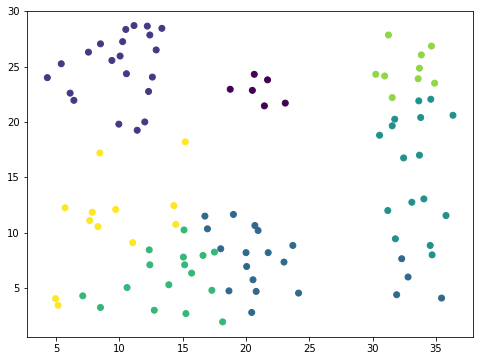

In [266]:
plt.figure(figsize=(8, 6))
plt.scatter(test[:,0], test[:,1], c=labeltest.astype(int))